In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [61]:
values = pd.read_csv('../trading-wind-energy/energy-interpolated.csv')
values

,Time,Energy Prooduction (kWh)
0,2017-01-01 01:00:00,0.0
1,2017-01-01 02:00:00,0.0
2,2017-01-01 03:00:00,0.0
3,2017-01-01 04:00:00,0.0
4,2017-01-01 05:00:00,0.0
...,...,...
30845,2020-07-09 06:00:00,6000.0
30846,2020-07-09 07:00:00,6000.0
30847,2020-07-09 08:00:00,6000.0
30848,2020-07-09 09:00:00,6000.0


In [62]:
# Shift data to get t-1
df = pd.concat([values['Energy Prooduction (kWh)'].shift(), values['Energy Prooduction (kWh)']], axis=1)
df.columns = ['t-1', 't+0']
df

,t-1,t+0
0,NaN,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
30845,5500.0,6000.0
30846,6000.0,6000.0
30847,6000.0,6000.0
30848,6000.0,6000.0


In [63]:
# Normalization
x, y = df.values[:,0].reshape(-1, 1), df.values[:,1].reshape(-1, 1)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(x)
xscale = scaler_x.transform(x)
scaler_y.fit(y)
yscale = scaler_y.transform(y)

In [64]:
# Split into train and test set
train_size = int(df.shape[0]*0.8)
train_X, train_y = xscale[:train_size], yscale[:train_size]
test_X, test_y = xscale[train_size:], yscale[train_size:]
print(train_X, train_y)

[[       nan]
 [0.        ]
 [0.        ]
 ...
 [0.34831461]
 [0.26966292]
 [0.29775281]] [[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.26966292]
 [0.29775281]
 [0.31460674]]


In [65]:
# persistence model
def model_persistence(x):
	return x

In [66]:
# walk-forward validation
predictions = list()
for x in test_X:
	pred = model_persistence(x)
	predictions.append(pred)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 0.006


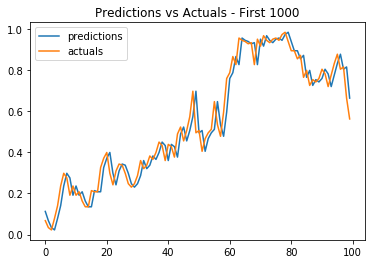

In [68]:
# plot predictions and expected results
# pyplot.plot(train_y)
# pyplot.plot([None for i in train_y] + [x for x in test_y])
# pyplot.plot([None for i in train_y] + [x for x in predictions])
# pyplot.show()

plt.plot(predictions[700:800], label='predictions')
plt.plot(test_y[700:800], label='actuals')
plt.legend()
plt.title('Predictions vs Actuals - First 1000')
plt.show()